In [31]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [32]:
df = pd.read_excel(r'G:\traindata\RFMtest\tmp.xlsx')
df.head()

,payment,trdtime,id,name
0,1.0,2019-12-25 01:07:14,13,吕游
1,NaN,2019-12-30 07:39:22,13,吕游
2,48.5,2020-06-22 11:51:51,46,卢芬
3,16.5,2020-06-27 02:32:09,46,卢芬
4,221.4,2020-06-30 12:15:34,46,卢芬


In [33]:
df['trdtime'] = pd.to_datetime(df['trdtime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   payment  390 non-null    float64       
 1   trdtime  394 non-null    datetime64[ns]
 2   id       394 non-null    int64         
 3   name     393 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 12.4+ KB


In [34]:
df['trdtime'].min()

Timestamp('2019-12-25 01:07:14')

In [35]:
R_today = dt.datetime(2020,8,27)

In [36]:
df['R_diff'] = (R_today-df['trdtime']).dt.days
df.head()

,payment,trdtime,id,name,R_diff
0,1.0,2019-12-25 01:07:14,13,吕游,245
1,NaN,2019-12-30 07:39:22,13,吕游,240
2,48.5,2020-06-22 11:51:51,46,卢芬,65
3,16.5,2020-06-27 02:32:09,46,卢芬,60
4,221.4,2020-06-30 12:15:34,46,卢芬,57


In [37]:
R = df.groupby(by = ['id'])['R_diff']
R.head()

0      245
1      240
2       65
3       60
4       57
      ... 
389      2
390      2
391      2
392      2
393      1
Name: R_diff, Length: 373, dtype: int64

In [38]:
R = R.agg([('R_diff','min')])
R.head()

,R_diff
id,
13,240
46,38
48,13
51,18
82,239


In [39]:
F = df.groupby(by = ['id'])['id'].agg([('F_fre','count')])

In [40]:
M = df.groupby(by = ['id'])['payment'].agg([('M_sum',sum)])
RFM = R.join(F).join(M)
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 13 to 514
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R_diff  262 non-null    int64  
 1   F_fre   262 non-null    int64  
 2   M_sum   262 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 18.2 KB


In [41]:
# person = RFM.groupby(by = ['F_fre'])['F_fre'].agg([('F_fre','count')])
# person.head(20)

In [42]:
RFM.describe()

,R_diff,F_fre,M_sum
count,262.000000,262.000000,262.000000
mean,29.015267,1.503817,72.784733
std,24.710891,1.352585,97.306767
min,1.000000,1.000000,1.000000
25%,18.000000,1.000000,24.350000
50%,26.000000,1.000000,42.950000
75%,34.000000,1.000000,79.400000
max,240.000000,14.000000,964.700000


In [43]:
bins = RFM['R_diff'].quantile(q = np.linspace(0,1,6),interpolation = 'nearest')
bins[0] = 0
labels =  [5,4,3,2,1]
R = pd.cut(RFM['R_diff'],bins,labels = labels)

bins = [1,2,5,8,200]
labels = np.arange(1,5)
F = pd.cut(RFM['F_fre'], bins=bins, labels=labels,include_lowest=True)

bins = RFM['M_sum'].quantile(q = np.linspace(0,1,6),interpolation = 'nearest')
bins[0] = 0
labels = [1,2,3,4,5]
M = pd.cut(RFM['M_sum'],bins,labels = labels)

RFM['R'] = R
RFM['F'] = F
RFM['M'] = M
RFM.head()

In [45]:
RFM.describe()

,R_diff,F_fre,M_sum
count,262.000000,262.000000,262.000000
mean,29.015267,1.503817,72.784733
std,24.710891,1.352585,97.306767
min,1.000000,1.000000,1.000000
25%,18.000000,1.000000,24.350000
50%,26.000000,1.000000,42.950000
75%,34.000000,1.000000,79.400000
max,240.000000,14.000000,964.700000


In [44]:
RFM_TEST = RFM.copy()

In [15]:
cluster=[]
for i in range(len(RFM_TEST)):
    if RFM_TEST.iloc[i,3] >= 3 and RFM_TEST.iloc[i,4] >=2 and RFM_TEST.iloc[i,5] >=3:
        cluster.append('高价值客户')
    elif RFM_TEST.iloc[i,3] < 3 and RFM_TEST.iloc[i,4] >= 2 and RFM_TEST.iloc[i,5] >=3:
        cluster.append('重点保持客户')
    elif RFM_TEST.iloc[i,3] >= 3 and RFM_TEST.iloc[i,4] < 2 and RFM_TEST.iloc[i,5] >=3:
        cluster.append('重点发展客户')
    elif RFM_TEST.iloc[i,3] < 3 and RFM_TEST.iloc[i,4] < 2 and RFM_TEST.iloc[i,5] >= 3:
        cluster.append('重点挽留客户')
    elif RFM_TEST.iloc[i,3] >= 3 and RFM_TEST.iloc[i,4] >= 2 and RFM_TEST.iloc[i,5] < 3:
        cluster.append('一般价值客户')
    elif RFM_TEST.iloc[i,3] < 3 and RFM_TEST.iloc[i,4] >= 2 and RFM_TEST.iloc[i,5] < 3:
        cluster.append('一般保持客户')
    elif RFM_TEST.iloc[i,3] >= 3 and RFM_TEST.iloc[i,4] < 2 and RFM_TEST.iloc[i,5] < 3:
        cluster.append('一般发展客户')
    else:
        cluster.append('潜在客户')
RFM_TEST['type'] = cluster

In [16]:
df3 = RFM_TEST.reset_index()
df3

,id,R_diff,F_fre,M_sum,R1,F1,M1,typez
0,13,240,2,1.0,1,1,1,潜在客户
1,46,38,5,347.4,2,2,5,重点保持客户
2,48,13,4,170.6,5,2,5,高价值客户
3,51,18,7,606.3,4,3,5,高价值客户
4,82,239,4,1.0,1,2,1,一般保持客户
...,...,...,...,...,...,...,...,...
257,510,2,1,258.0,5,1,5,重点发展客户
258,511,2,1,294.0,5,1,5,重点发展客户
259,512,2,1,92.0,5,1,4,重点发展客户
260,513,2,1,57.9,5,1,4,重点发展客户


In [17]:
RFM.describe()

,R_diff,F_fre,M_sum
count,262.000000,262.000000,262.000000
mean,29.015267,1.503817,72.784733
std,24.710891,1.352585,97.306767
min,1.000000,1.000000,1.000000
25%,18.000000,1.000000,24.350000
50%,26.000000,1.000000,42.950000
75%,34.000000,1.000000,79.400000
max,240.000000,14.000000,964.700000


In [18]:
RFM['RFM'] = 0.3*R1.astype(float)+0.1*F1.astype(float)+0.5*M1.astype(float)
RFM.head()

,R_diff,F_fre,M_sum,R1,F1,M1,RFM
id,,,,,,,
13,240,2,1.0,1,1,1,0.9
46,38,5,347.4,2,2,5,3.3
48,13,4,170.6,5,2,5,4.2
51,18,7,606.3,4,3,5,4.0
82,239,4,1.0,1,2,1,1.0


In [19]:
bins = RFM['RFM'].quantile(q = [0,0.125,0.25,0.375,0.5,0.625,0.75,0.875,1],interpolation='nearest')
bins[0] =0
labels =  ['流失客户','一般维持客户','一般发展客户','潜力客户','重要挽留客户','重要保持客户','重要发展客户','重要价值客户']
RFM['types'] = pd.cut(RFM.RFM,bins,labels=labels)
RFM.head() 

,R_diff,F_fre,M_sum,R1,F1,M1,RFM,types
id,,,,,,,,
13,240,2,1.0,1,1,1,0.9,流失客户
46,38,5,347.4,2,2,5,3.3,重要保持客户
48,13,4,170.6,5,2,5,4.2,重要价值客户
51,18,7,606.3,4,3,5,4.0,重要价值客户
82,239,4,1.0,1,2,1,1.0,流失客户


In [20]:
df2 = RFM.reset_index()
df2

,id,R_diff,F_fre,M_sum,R1,F1,M1,RFM,types
0,13,240,2,1.0,1,1,1,0.9,流失客户
1,46,38,5,347.4,2,2,5,3.3,重要保持客户
2,48,13,4,170.6,5,2,5,4.2,重要价值客户
3,51,18,7,606.3,4,3,5,4.0,重要价值客户
4,82,239,4,1.0,1,2,1,1.0,流失客户
...,...,...,...,...,...,...,...,...,...
257,510,2,1,258.0,5,1,5,4.1,重要价值客户
258,511,2,1,294.0,5,1,5,4.1,重要价值客户
259,512,2,1,92.0,5,1,4,3.6,重要发展客户
260,513,2,1,57.9,5,1,4,3.6,重要发展客户


In [21]:
# df2.to_excel("testYD22.xlsx")

In [22]:
Money_ql = RFM.groupby(by = ['types'])['M_sum'].agg([('money_diff',sum)]).reset_index()
Money_ql.head(9)

,types,money_diff
0,流失客户,637.7
1,一般维持客户,656.6
2,一般发展客户,1469.8
3,潜力客户,1350.1
4,重要挽留客户,1218.4
5,重要保持客户,4050.1
6,重要发展客户,3044.6
7,重要价值客户,6642.3


In [23]:
person = RFM.groupby(by = ['types'])['types'].agg([('types','count')])
person.head(9)

,types
types,
流失客户,36
一般维持客户,36
一般发展客户,41
潜力客户,26
重要挽留客户,28
重要保持客户,37
重要发展客户,29
重要价值客户,29


In [24]:
person3 = RFM_TEST.groupby(by = ['typez'])['typez'].agg([('typez','count')])
person3.head(9)

,typez
typez,
一般保持客户,1
一般发展客户,58
潜在客户,46
重点保持客户,2
重点发展客户,79
重点挽留客户,55
高价值客户,21


In [25]:
person2 = RFM.groupby(by = ['F1'])['F1'].agg([('F1','count')])
person2.head(9)

,F1
F1,
1,238
2,16
3,7
4,1


In [26]:
df1 = RFM.reset_index()
df1

,id,R_diff,F_fre,M_sum,R1,F1,M1,RFM,types
0,13,240,2,1.0,1,1,1,0.9,流失客户
1,46,38,5,347.4,2,2,5,3.3,重要保持客户
2,48,13,4,170.6,5,2,5,4.2,重要价值客户
3,51,18,7,606.3,4,3,5,4.0,重要价值客户
4,82,239,4,1.0,1,2,1,1.0,流失客户
...,...,...,...,...,...,...,...,...,...
257,510,2,1,258.0,5,1,5,4.1,重要价值客户
258,511,2,1,294.0,5,1,5,4.1,重要价值客户
259,512,2,1,92.0,5,1,4,3.6,重要发展客户
260,513,2,1,57.9,5,1,4,3.6,重要发展客户


In [27]:
df1 = df1.pivot_table('id',index = 'types',aggfunc='count')
df1 = df1.rename(columns = {'id':'numbers'}).reset_index()
df1

,types,numbers
0,流失客户,36
1,一般维持客户,36
2,一般发展客户,41
3,潜力客户,26
4,重要挽留客户,28
5,重要保持客户,37
6,重要发展客户,29
7,重要价值客户,29


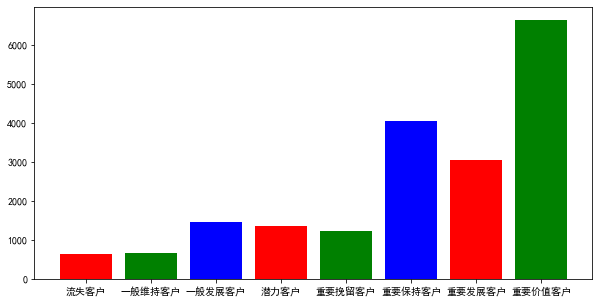

In [28]:
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False   #如果表中有中文，则需要添加上面两行
plt.figure(figsize=(10,5))
plt.bar(data=Money_ql,x = 'types',height = 'money_diff',color = 'rgb')
plt.show()

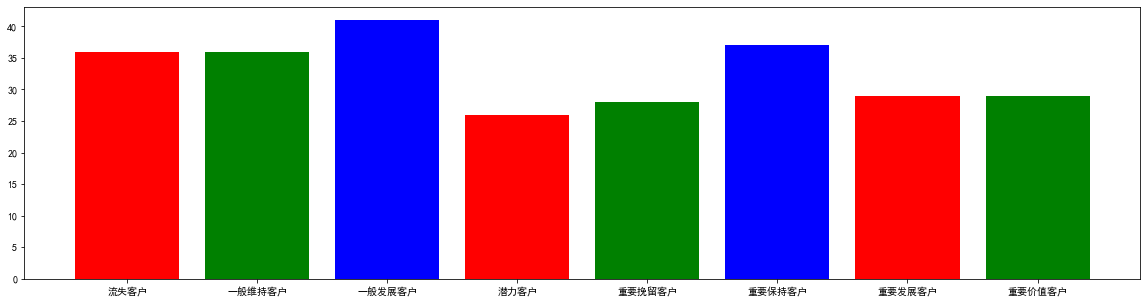

In [29]:
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(20,5))
plt.bar(data=df1,x = 'types',height = 'numbers',color = 'rgb')
plt.show()